In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


### Data Preparation

In [2]:
crypto_df = pd.read_csv("crypto_data.csv")
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
# Filter for currencies that are currently being traded.
crypto_clean = crypto_df[crypto_df["IsTrading"] == True]
crypto_clean

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [4]:
# Drop the `IsTrading` column from the dataframe.
crypto_drop = crypto_clean.drop("IsTrading", axis=1)
crypto_drop.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [5]:
# Remove all rows that have at least one null value.
crypto_no_nulls = crypto_drop.dropna()
crypto_no_nulls

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [6]:
# Filter for cryptocurrencies that have been mined. 
# Total coins mined greater than zero.
crypto_filtered = crypto_no_nulls.loc[crypto_clean["TotalCoinsMined"] > 0]
crypto_filtered

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [7]:
# Data should be numeric for dataset to be comprehensible to a machine learning algorithm. 
# Delete the `CoinName` from the dataframe.
crypto_delete = crypto_filtered.drop("CoinName", axis=1)
crypto_delete

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,PoW,7.296538e+06,21000000


In [8]:
# Delete the `Unnamed: 0` from the dataframe. Looks to be a ticker label?
crypto_delete2 = crypto_delete.drop("Unnamed: 0", axis=1)
crypto_delete2

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [9]:
crypto_delete2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        532 non-null    object 
 1   ProofType        532 non-null    object 
 2   TotalCoinsMined  532 non-null    float64
 3   TotalCoinSupply  532 non-null    object 
dtypes: float64(1), object(3)
memory usage: 20.8+ KB


In [10]:
# Since 'TotalCoinSupply' is a number but is seen as an object, run to-numeric.
crypto_delete2["TotalCoinSupply"] = pd.to_numeric(crypto_delete2["TotalCoinSupply"])
crypto_numeric = crypto_delete2
crypto_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        532 non-null    object 
 1   ProofType        532 non-null    object 
 2   TotalCoinsMined  532 non-null    float64
 3   TotalCoinSupply  532 non-null    float64
dtypes: float64(2), object(2)
memory usage: 20.8+ KB


In [11]:
# Convert categorical data, `Algorithm` and `ProofType`, into numerical data. 
# Use Pandas to create dummy variables. 
crypto_numeric_all = pd.get_dummies(crypto_numeric)
crypto_numeric_all

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Standardize dataset so columns containing larger values don't unduly influence the outcome.
crypto_scaled = StandardScaler().fit_transform(crypto_numeric_all)
crypto_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

### Dimensionality Reduction


In [13]:
# Perform dimensionality reduction with PCA. 
# Preserve 90% of the explained variance in dimensionality reduction.

# Initialize PCA model
pca = PCA(n_components=.90)

# Get principal components for 90%.
crypto_pca = pca.fit_transform(crypto_scaled)

# Transform PCA data to a DataFrame
crypto_pca_df = pd.DataFrame(crypto_pca)
crypto_pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,2.734816e-12,-5.417255e-15,-1.223976e-16,-0.007129,-1.319756,-0.051813,...,7.930746e-17,1.066184e-15,2.929092e-15,-7.260564e-16,-1.958946e-15,1.858141e-15,-1.863509e-15,7.873066e-16,-1.846167e-18,-4.153611e-15
1,-0.318434,1.032331,-0.591126,0.001386,2.712386e-12,-5.575109e-15,-2.141355e-16,-0.007739,-1.322514,-0.056674,...,5.236227e-17,3.558103e-16,3.123007e-15,-5.243003e-17,-1.703046e-15,1.069014e-15,-1.856951e-15,1.174094e-15,5.251165e-16,-3.804973e-15
2,2.305468,1.656383,-0.683617,0.004731,9.322259e-12,-6.700325e-15,7.872127e-15,-0.054781,-1.542879,-0.943951,...,3.638111e-14,-1.841986e-14,-5.521324e-14,-7.303804e-14,2.329683e-14,-3.527460e-14,3.114482e-14,2.752079e-14,-2.364644e-14,2.844002e-14
3,-0.145184,-1.320593,0.192813,-0.001229,-2.420624e-12,2.357806e-15,-1.697979e-15,-0.002071,0.281463,0.251862,...,4.765898e-15,2.352318e-17,-2.522688e-14,6.604406e-15,-9.542520e-15,-1.391009e-14,2.591484e-15,2.225494e-15,4.614234e-15,4.660314e-15
4,-0.151768,-2.036192,0.396182,-0.001705,-3.352037e-12,2.706411e-15,-1.587523e-15,0.027735,0.519099,0.188820,...,-3.035501e-14,6.137487e-14,-3.172419e-14,-3.873903e-14,-7.522860e-14,-7.057959e-14,4.784940e-14,9.436182e-15,1.251016e-13,-3.544121e-15


In [14]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.0279317 , 0.02141802, 0.02051615, 0.02044661, 0.0204466 ,
       0.0204466 , 0.0204466 , 0.02042554, 0.01870913, 0.01756291,
       0.01741106, 0.01629007, 0.01596154, 0.01551138, 0.01435005,
       0.01321122, 0.01236583, 0.01206255, 0.01104295, 0.01071499,
       0.01049079, 0.01040887, 0.01039089, 0.01037741, 0.01035414,
       0.01034034, 0.01029605, 0.01028233, 0.01028139, 0.01028139,
       0.01028138, 0.01027965, 0.01027051, 0.01026331, 0.01026202,
       0.01025761, 0.01025565, 0.01025068, 0.01024924, 0.01024279,
       0.01024259, 0.01024259, 0.0102419 , 0.01024018, 0.01023676,
       0.01023495, 0.01023   , 0.01022442, 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ])

In [25]:
# Reduce the dataset dimensions with t-SNE and visually inspect the results

# Initialize t-SNE model
tsne = TSNE(learning_rate=55)

In [26]:
# Reduce dimensions
tsne_features = tsne.fit_transform(crypto_pca_df)
tsne_features

array([[ 10.246849 , -17.914404 ],
       [ 12.756421 , -23.085424 ],
       [  3.8808298, -29.102232 ],
       ...,
       [-20.92449  ,   1.9917682],
       [-13.952241 ,  -7.1900063],
       [ 17.606499 ,   1.581576 ]], dtype=float32)

In [27]:
# The dataset has 2 columns
tsne_features.shape

(532, 2)

In [28]:
# Prepare to plot the dataset

# The first column of transformed features
crypto_pca_df['x'] = tsne_features[:,0]

# The second column of transformed features
crypto_pca_df['y'] = tsne_features[:,1]

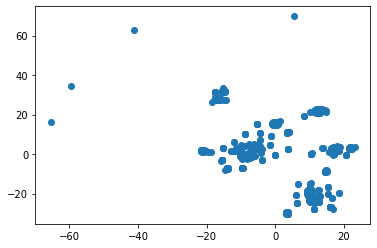

In [29]:
# Visualize the clusters
plt.scatter(crypto_pca_df['x'], crypto_pca_df['y'])
plt.show()

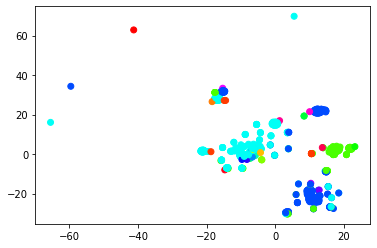

In [30]:
labels = LabelEncoder().fit_transform(crypto_numeric['ProofType'])

# Visualize the clusters with color
plt.scatter(crypto_pca_df['x'], crypto_pca_df['y'], c=labels, cmap='hsv')
plt.show()

### Cluster Analysis with k-Means

In [31]:
# Create an elbow plot to identify the best number of clusters.
# Use a for-loop to determine the inertia for each k between 1 through 10.


inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_crypto_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

NameError: name 'KMeans' is not defined

### Recommendation